#LightCnnRad

💠 A lightweight CNN developed specifically for radiology image analysis.


Introducing "LightCnnRad," an innovative CNN algorithm meticulously crafted for the precise analysis of radiology images, including MRI and CT scans. The uniqueness of LightCnnRad lies in its minimal number of hidden layers, strategically designed to strike a harmonious balance between complexity and efficiency. This lightweight architecture not only ensures that the model can be trained from scratch but also guards against the perils of overfitting, a common challenge in deep learning. LightCnnRad's foundation is rooted in its adaptability to radiology image datasets, enabling it to capture intricate nuances while maintaining generalization prowess. The algorithm's streamlined structure allows it to swiftly process these images, making it an ideal choice for medical professionals seeking rapid and accurate insights. With LightCnnRad, the realm of radiology image analysis is poised to witness a significant leap forward in both accuracy and efficiency.





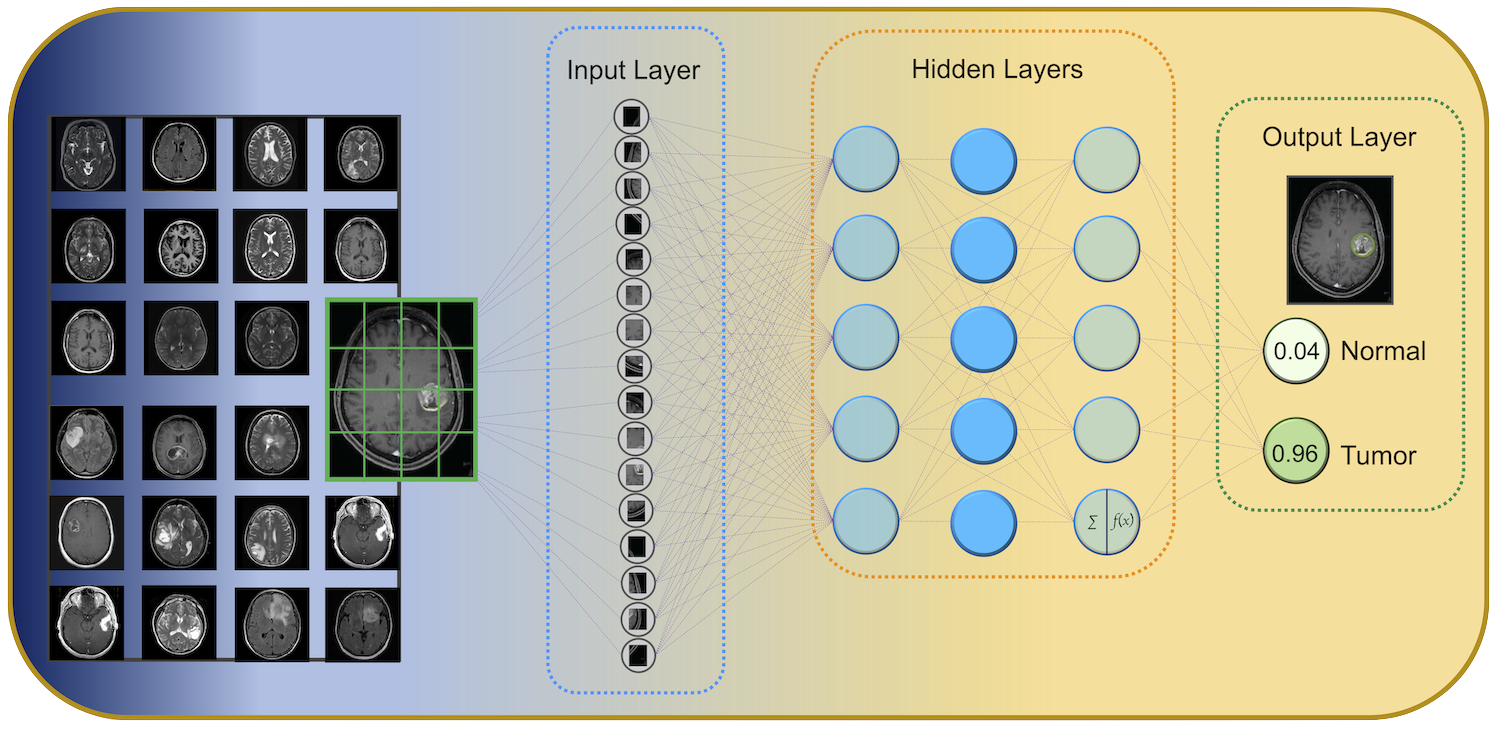

The provided GitHub repository for LightCnnRad offers a comprehensive resource to both experts and beginners in the field of deep learning and radiology image analysis. Notably, the repository includes a meticulously crafted Colab file, complete with step-by-step instructions. This feature empowers even those new to deep learning to confidently navigate through the process of training the model. With a user-friendly approach, the Colab file serves as a valuable guide, enabling beginners to embark on a successful journey of model training without unnecessary complexities. Whether you're an experienced practitioner or a novice eager to explore the world of deep learning, the LightCnnRad GitHub repository equips you with the tools and guidance needed to harness the power of this innovative algorithm effectively.


💠 Please access the "LightCnnRad.ipynb" file on Google Colab and follow the provided instructions. Additionally, you can find sample images labeled as "Data_Brain.zip" in the "Images" folder. Please be aware that these images are provided as examples to demonstrate the required format, and you will need to gather a larger set of images for training the model. The complete collection of images is available for download from the following resources: Ref1, Ref2, and Ref3.

✅ The development of LightCnnRad is a collaborative effort, with credit attributed to the contributions of Eshaan Haque, Aashi Hirani, Howe Chen, WintPyae LynnHtaik, Tassadit Lounes, Raecine Greaves, Mehnaz Hoque, Maxwell Boger, Charlene Chung, and Ebtisam Mohamed.

#GPU
Ensure that your GPU is active before proceeding with the image upload and code execution. You can configure the GPU settings under "Runtime."

# Upload images

We are working with MRI and CT images. The images were obtained from Kaggle:

Ref1: Nickparvar, M. (2021). Brain Tumor MRI Dataset. https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset.

Ref2: Mooney, P. (2018). Chest X-Ray Images. https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia.

Ref3: Dubey, S. (2020). Alzheimer's Dataset. https://www.kaggle.com/datasets/tourist55/alzheimers-dataset-4-class-of-images.

Let's upload the images to Google Drive to ensure they are not lost every time we run the code in Colab.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Let's extract the contents of the compressed zip file.

In [ ]:
import zipfile
!unzip "/content/gdrive/MyDrive/ColabNotebooks_PegahKhosravi/Summer_2023/Data_Brain.zip" -d data

Please remove the "__MACOSX" file; it is unnecessary for our purposes.

In [3]:
!rm -rf '/content/data/__MACOSX'

Import all the necessary libraries.

In [4]:
#Load libraries
import os
import numpy as np
import torch
import glob
import torch.nn as nn
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
from torch.optim import Adam
from torch.autograd import Variable
import torchvision
import pathlib

In [5]:
#checking for device
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [6]:
print(device)

cuda


In [7]:
# Transformations to preprocess input images before feeding to the model
transformer = transforms.Compose([
    # Resize the image to (150, 150) pixels
    transforms.Resize((150, 150)),

    # Apply random horizontal flip for data augmentation
    transforms.RandomHorizontalFlip(),

    # Convert the image to a tensor (0-255 to 0-1), and reshape it to (C, H, W)
    # where C represents the number of channels (3 for RGB), and H, W are height and width
    transforms.ToTensor(),

    # Normalize the tensor values to a range of [-1, 1]
    # by applying (x - mean) / std where mean = 0.5 and std = 0.5
    transforms.Normalize(
        [0.5, 0.5, 0.5],   # Mean for each channel (RGB)
        [0.5, 0.5, 0.5]    # Standard deviation for each channel (RGB)
    )
])

In [8]:
# Import required libraries
from torch.utils.data import DataLoader
import torchvision

# Path for training and validation directory
train_path = "/content/data/Data_Brain/training"
validation_path = "/content/data/Data_Brain/validation"

# Define data loaders for training and validation datasets
# DataLoader for training dataset
train_loader = DataLoader(
    torchvision.datasets.ImageFolder(train_path, transform=transformer),  # Use the previously defined transformer
    batch_size=128,         # Number of samples in each batch
    shuffle=True            # Shuffle the data for each epoch
)

# DataLoader for validation dataset
validation_loader = DataLoader(
    torchvision.datasets.ImageFolder(validation_path, transform=transformer),  # Use the same transformer
    batch_size=64,          # Number of samples in each batch
    shuffle=True            # Shuffle the data for each epoch
)

In [17]:
import pathlib

# Define the path for the training directory
train_path = "/content/data/Data_Brain/training"

# Get a pathlib.Path object for the training directory
root = pathlib.Path(train_path)

# Generate a sorted list of class labels/categories
classes = sorted([j.name.split('/')[-1] for j in root.iterdir()])

Remove the ".DS_Store" file from the training, validation, and test sets, as it is not needed. Please execute this section twice for each set, and before each run, ensure to execute the code above to ensure a clear path from the root.

In [ ]:
!rm "/content/data/Data_Brain/training/.DS_Store"

In [19]:
print(classes)

['NoTumor', 'Tumor']


Let's define the Convolutional Neural Network (CNN) class

In [20]:
import torch.nn as nn

# Define a Convolutional Neural Network (CNN) class
class LightCnnRad(nn.Module):
    def __init__(self, num_classes=2):
        super(LightCnnRad, self).__init__()

        # Define the architecture of the CNN

        # First convolutional layer
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=12, kernel_size=3, stride=1, padding=1)
        # Batch normalization layer
        self.bn1 = nn.BatchNorm2d(num_features=12)
        # ReLU activation function
        self.relu1 = nn.ReLU()

        # Max pooling layer to reduce image size by factor 2
        self.pool = nn.MaxPool2d(kernel_size=2)

        # Second convolutional layer
        self.conv2 = nn.Conv2d(in_channels=12, out_channels=20, kernel_size=3, stride=1, padding=1)
        # ReLU activation function
        self.relu2 = nn.ReLU()

        # Third convolutional layer
        self.conv3 = nn.Conv2d(in_channels=20, out_channels=32, kernel_size=3, stride=1, padding=1)
        # Batch normalization layer
        self.bn3 = nn.BatchNorm2d(num_features=32)
        # ReLU activation function
        self.relu3 = nn.ReLU()

        # Fully connected layer to make predictions
        self.fc = nn.Linear(in_features=75 * 75 * 32, out_features=num_classes)

    # Forward propagation function
    def forward(self, input):
        output = self.conv1(input)
        output = self.bn1(output)
        output = self.relu1(output)

        output = self.pool(output)

        output = self.conv2(output)
        output = self.relu2(output)

        output = self.conv3(output)
        output = self.bn3(output)
        output = self.relu3(output)

        # Flatten the output from the convolutional layers
        output = output.view(-1, 32 * 75 * 75)

        # Fully connected layer to make predictions
        output = self.fc(output)

        return output


We define the class number as 2, indicating binary classification for our model.

In [21]:
model=LightCnnRad(num_classes=2).to(device)

Now, let's define the optimizers and loss function.

In [22]:
import torch.optim as optim
import torch.nn as nn

# Define the optimizer and loss function

# Use the RMSprop optimizer
optimizer = optim.RMSprop(model.parameters(), lr=0.0001, weight_decay=0.00001)

# Use the CrossEntropyLoss for multi-class classification
loss_function = nn.CrossEntropyLoss()

Next, let's set the desired number of epochs for training the model.

In [23]:
num_epochs=20

In [24]:
#calculating the size of training and testing images
train_count=len(glob.glob(train_path+'/**/*.png'))
validation_count=len(glob.glob(validation_path+'/**/*.png'))

Now, let's take a look at the number of images present in both the training and validation folders.

In [25]:
print(train_count,validation_count)

838 60


Now, Let's train the model.

In [26]:
import matplotlib.pyplot as plt

# Lists to store accuracy and loss values for training and validation
train_acc_history = []
train_loss_history = []
validation_acc_history = []
validation_loss_history = []

best_accuracy = 0.0

for epoch in range(num_epochs):
    # Model training and evaluation on training dataset
    model.train()
    train_accuracy = 0.0
    train_loss = 0.0

    for i, (images, labels) in enumerate(train_loader):
        if torch.cuda.is_available():
            images = Variable(images.cuda())
            labels = Variable(labels.cuda())

        optimizer.zero_grad()

        outputs = model(images)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.cpu().data * images.size(0)
        _, prediction = torch.max(outputs.data, 1)
        train_accuracy += int(torch.sum(prediction == labels.data))

    train_accuracy = train_accuracy / train_count
    train_loss = train_loss / train_count

    # Evaluation on validation dataset
    model.eval()

    validation_accuracy = 0.0
    validation_loss = 0.0

    for i, (images, labels) in enumerate(validation_loader):
        if torch.cuda.is_available():
            images = Variable(images.cuda())
            labels = Variable(labels.cuda())

        outputs = model(images)
        loss = loss_function(outputs, labels)

        validation_loss += loss.cpu().data * images.size(0)
        _, prediction = torch.max(outputs.data, 1)
        validation_accuracy += int(torch.sum(prediction == labels.data))

    validation_accuracy = validation_accuracy / validation_count
    validation_loss = validation_loss / validation_count

    print('Epoch: ' + str(epoch) + ' Train Loss: ' + str(train_loss) +
          ' Train Accuracy: ' + str(train_accuracy) +
          ' Validation Loss: ' + str(validation_loss) +
          ' Validation Accuracy: ' + str(validation_accuracy))

    # Save the best model checkpoint
    if validation_accuracy > best_accuracy:
        torch.save(model.state_dict(), 'best_checkpoint.model')
        best_accuracy = validation_accuracy

    # Append accuracy and loss values to the history lists
    train_acc_history.append(train_accuracy)
    train_loss_history.append(train_loss)
    validation_acc_history.append(validation_accuracy)
    validation_loss_history.append(validation_loss)

Epoch: 0 Train Loss: tensor(12.3908) Train Accuracy: 0.6288782816229117 Validation Loss: tensor(1.8027) Validation Accuracy: 0.5
Epoch: 1 Train Loss: tensor(3.8966) Train Accuracy: 0.733890214797136 Validation Loss: tensor(1.0181) Validation Accuracy: 0.5333333333333333
Epoch: 2 Train Loss: tensor(2.9782) Train Accuracy: 0.733890214797136 Validation Loss: tensor(4.2158) Validation Accuracy: 0.5
Epoch: 3 Train Loss: tensor(2.2861) Train Accuracy: 0.7505966587112172 Validation Loss: tensor(1.3967) Validation Accuracy: 0.5833333333333334
Epoch: 4 Train Loss: tensor(1.5294) Train Accuracy: 0.7828162291169452 Validation Loss: tensor(2.9159) Validation Accuracy: 0.5166666666666667
Epoch: 5 Train Loss: tensor(1.0512) Train Accuracy: 0.8162291169451074 Validation Loss: tensor(1.8450) Validation Accuracy: 0.6666666666666666
Epoch: 6 Train Loss: tensor(2.1179) Train Accuracy: 0.7136038186157518 Validation Loss: tensor(2.2592) Validation Accuracy: 0.6
Epoch: 7 Train Loss: tensor(0.3898) Train Acc

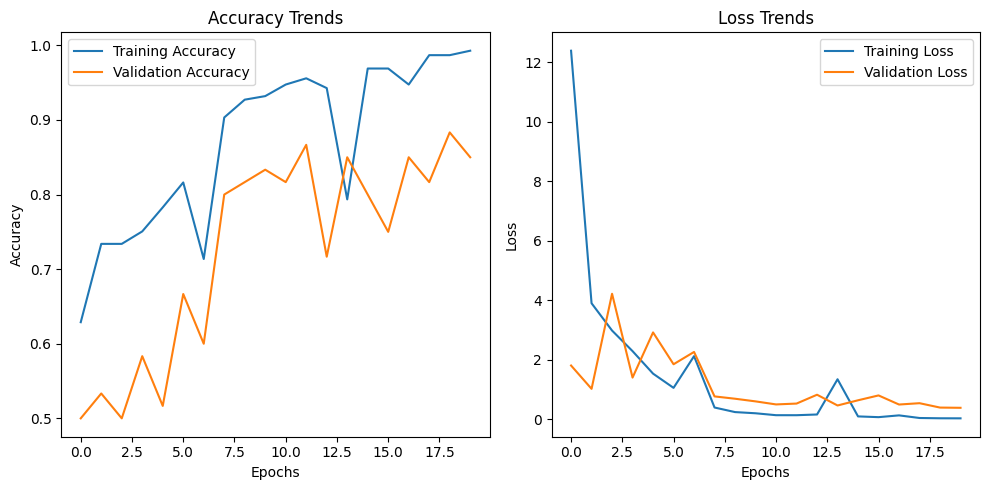

In [27]:
# Plotting the accuracy trends
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_acc_history, label='Training Accuracy')
plt.plot(validation_acc_history, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Trends')
plt.legend()

# Plotting the loss trends
plt.subplot(1, 2, 2)
plt.plot(train_loss_history, label='Training Loss')
plt.plot(validation_loss_history, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Trends')
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()

Now, let's test the best model on a blind test set. You can proceed with the following code for prediction.

In [28]:
import torch
import torch.nn as nn
from torchvision.transforms import transforms
import numpy as np
from torch.autograd import Variable
from torchvision.models import squeezenet1_1
import torch.functional as F
from io import open
import os
from PIL import Image
import pathlib
import glob
import cv2

In [29]:
train_path="/content/data/Data_Brain/training"
pred_path="/content/data/Data_Brain/test"

In [30]:
test_count=len(glob.glob(pred_path+'/*.png'))

In [31]:
print(test_count)

50


In [32]:
checkpoint=torch.load("best_checkpoint.model")
model=LightCnnRad(num_classes=2)
model.load_state_dict(checkpoint)
model.eval()

LightCnnRad(
  (conv1): Conv2d(3, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU()
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(12, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (conv3): Conv2d(20, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu3): ReLU()
  (fc): Linear(in_features=180000, out_features=2, bias=True)
)

This illustrates the architecture of your model and the number of parameters that need to be calculated during the training process.

In [33]:
from torchsummary import summary

model=model.cuda()

summary(model, (3,150,150))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 12, 150, 150]             336
       BatchNorm2d-2         [-1, 12, 150, 150]              24
              ReLU-3         [-1, 12, 150, 150]               0
         MaxPool2d-4           [-1, 12, 75, 75]               0
            Conv2d-5           [-1, 20, 75, 75]           2,180
              ReLU-6           [-1, 20, 75, 75]               0
            Conv2d-7           [-1, 32, 75, 75]           5,792
       BatchNorm2d-8           [-1, 32, 75, 75]              64
              ReLU-9           [-1, 32, 75, 75]               0
           Linear-10                    [-1, 2]         360,002
Total params: 368,398
Trainable params: 368,398
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.26
Forward/backward pass size (MB): 12.53
Params size (MB): 1.41
Estimated 

In [34]:
# Transformations to preprocess input images before feeding to the model
transformer = transforms.Compose([
    # Resize the image to (150, 150) pixels
    transforms.Resize((150, 150)),

    # Convert the image to a tensor (0-255 to 0-1), and reshape it to (C, H, W)
    # where C represents the number of channels (3 for RGB), and H, W are height and width
    transforms.ToTensor(),

    # Normalize the tensor values to a range of [-1, 1]
    # by applying (x - mean) / std where mean = 0.5 and std = 0.5
    transforms.Normalize(
        [0.5, 0.5, 0.5],   # Mean for each channel (RGB)
        [0.5, 0.5, 0.5]    # Standard deviation for each channel (RGB)
    )
])

In [35]:
# Prediction function to predict class probabilities for an input image
def prediction(img_path, transformer, model):
    # Open and load the input image
    image = Image.open(img_path)

    # Apply transformations to the image
    image_tensor = transformer(image).float()
    image_tensor = image_tensor.unsqueeze_(0)

    if torch.cuda.is_available():
        image_tensor = image_tensor.cuda()

    # Perform inference (no need to compute gradients)
    with torch.no_grad():
        input = Variable(image_tensor)
        output = model(input)

    # Calculate class probabilities using softmax
    prob = nn.functional.softmax(output, dim=1)

    # Convert the tensor to a numpy array and move it to CPU
    prob = prob.cpu().detach().numpy()

    return prob

# Load the trained model and move it to the appropriate device (CPU or GPU)
model = LightCnnRad(num_classes=2)  # Create an instance of the LightCnnRad
model.load_state_dict(checkpoint)  # Load the trained model's weights
if torch.cuda.is_available():
    model.cuda()  # Move the model to GPU if available

# Get a list of image paths to predict
images_path = glob.glob(pred_path + '/*.png')

# Dictionary to store predictions
pred_dict = {}

# Loop through each image and make predictions
for i in images_path:
    filename = i[i.rfind('/') + 1:]  # Extract the filename from the path
    prob_array = prediction(i, transformer, model)  # Get predicted probabilities
    pred_dict[filename] = prob_array  # Store the probabilities in the dictionary

# Print the probabilities in the desired format
for filename, prob_array in pred_dict.items():
    formatted_prob_array = np.array2string(
        prob_array, separator=', ', formatter={'float_kind': lambda x: f'{x:.8e}'}
    )
    print(f"'{filename}': np.array({formatted_prob_array}, dtype=np.float32),")

'T_GliomaTumor_78.png': np.array([[5.69822431e-01, 4.30177599e-01]], dtype=np.float32),
'N_NoTumor34.png': np.array([[1.05962962e-01, 8.94037008e-01]], dtype=np.float32),
'N_NoTumor_3.png': np.array([[9.69610751e-01, 3.03892307e-02]], dtype=np.float32),
'T_Tr_PituitaryTumor_783.png': np.array([[6.28193319e-01, 3.71806651e-01]], dtype=np.float32),
'T_GliomaTumor_66.png': np.array([[2.93729710e-03, 9.97062743e-01]], dtype=np.float32),
'T_GliomaTumor_76.png': np.array([[1.26700044e-01, 8.73299897e-01]], dtype=np.float32),
'N_NoTumor31.png': np.array([[3.15669179e-01, 6.84330821e-01]], dtype=np.float32),
'T_YesTumor05.png': np.array([[9.90662142e-04, 9.99009252e-01]], dtype=np.float32),
'N_NoTumor_13.png': np.array([[4.48174477e-01, 5.51825523e-01]], dtype=np.float32),
'T_GliomaTumor_75.png': np.array([[9.97595489e-01, 2.40455358e-03]], dtype=np.float32),
'N_2_NoTumor_71.png': np.array([[9.99387980e-01, 6.12037606e-04]], dtype=np.float32),
'N_NoTumor_14.png': np.array([[2.83217281e-01, 7.1

Now, let's save the results in a file named "predictions.csv".

In [36]:
import csv
import numpy as np
import torch
import torch.nn as nn
from torchvision.transforms import transforms
from torch.autograd import Variable
from torchvision.models import squeezenet1_1
from io import open
import os
from PIL import Image
import pathlib
import glob
import cv2

# Define the path for saving the CSV file
output_csv_path = '/content/predictions.csv'

# Save prediction results to CSV
with open(output_csv_path, 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(['Label', 'Predict'])

    for filename, prob_array in pred_dict.items():
        csvwriter.writerow([filename, prob_array[0][1]])  # Writing full filename and prediction

print("Prediction results saved to", output_csv_path)

Prediction results saved to /content/predictions.csv


Finally, let's draw the ROC curve and Confusion Matrix, along with other measurements.

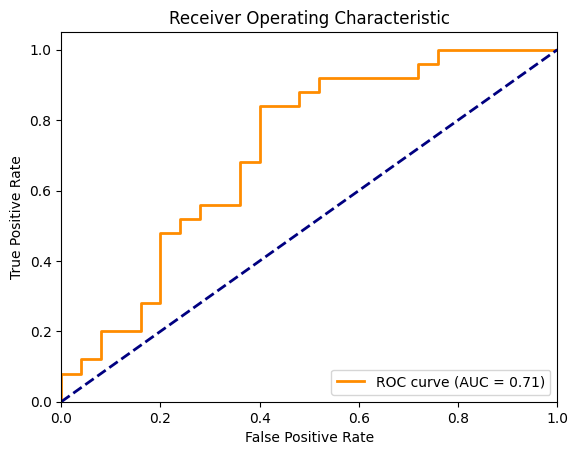

In [37]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Load data from predictions.csv
df = pd.read_csv('predictions.csv')

# Extract true labels and predicted probabilities
true_labels = df['Label']
predicted_probs = df['Predict']

# Convert labels to binary format (0 for 'N_' and 1 for 'T_')
true_labels = true_labels.apply(lambda x: 0 if x.startswith('N_') else 1)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(true_labels, predicted_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

True Positive: 18
True Negative: 15
False Positive: 10
False Negative: 7
Accuracy: 0.66
Sensitivity (True Positive Rate): 0.72
Specificity (True Negative Rate): 0.6


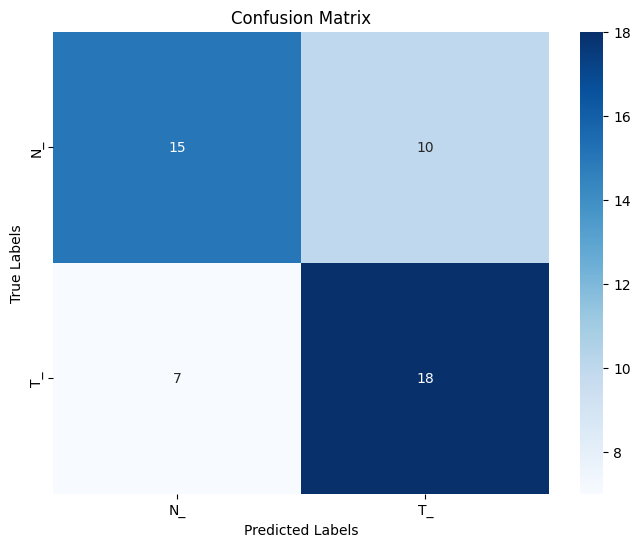

In [38]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file containing predictions
df = pd.read_csv('predictions.csv')

# Extract true labels and predicted probabilities
true_labels = df['Label']

# Preprocess true labels to extract class labels (e.g., 'N_' or 'T_')
class_labels = ['N_', 'T_']
true_labels_processed = [label[:2] for label in true_labels]

# Threshold to convert probabilities to binary predictions
threshold = 0.5
binary_predictions = np.where(df['Predict'] >= threshold, 'T_', 'N_')

# Calculate confusion matrix
cm = confusion_matrix(true_labels_processed, binary_predictions, labels=class_labels)

# Extract TP, TN, FP, FN from confusion matrix
tp = cm[1, 1]
tn = cm[0, 0]
fp = cm[0, 1]
fn = cm[1, 0]

# Calculate accuracy, sensitivity (True Positive Rate), and specificity (True Negative Rate)
accuracy = (tp + tn) / (tp + tn + fp + fn)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

# Display TP, TN, FP, FN
print("True Positive:", tp)
print("True Negative:", tn)
print("False Positive:", fp)
print("False Negative:", fn)

# Display accuracy, sensitivity, and specificity
print("Accuracy:", accuracy)
print("Sensitivity (True Positive Rate):", sensitivity)
print("Specificity (True Negative Rate):", specificity)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()